In [2]:
# Import relevant libraries
%matplotlib inline
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.datasets import load_wine

In [6]:
# Random data set
A = np.array([[1,2],[3,4],[5,6]])
print(f"{A}\n")

# Calculate the means of the columns
M = np.mean(A.T, axis = 1)
print(f"{M}\n")

# Centering the values in each column
C = A - M
print(f"{C}\n")

"""
C.T = [[-2,0,2]
       [-2,0,2]]
"""

# Calculate covariance matrix of C
V = np.cov(C.T)
print(f"{V}\n")

# Eigendecomposition of covariance matrix
values, vectors = eig(V)
print(f"{values}\n")
print(f"{vectors}\n")

"""

[[ 0.70710678  0.70710678]   [[-2 0 2]
 [-0.70710678  0.70710678]]   [-2 0 2]]

  2 x 2

 [[-2 0 2]
  [-2 0 2]]

  2 x 3

"""
# Dot product both for removal of feature
P = vectors.T.dot(C.T)
print(f"{P.T}\n")

[[1 2]
 [3 4]
 [5 6]]

[3. 4.]

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

[[4. 4.]
 [4. 4.]]

[8. 0.]

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]



In [7]:
# Reusable PCA function
A = np.array([[1,2],[3,4],[5,6]])

# Create PCA object
pca = PCA(2)

# Fit dataset to the object
pca.fit(A)

# Transform the dataset using PCA
B = pca.transform(A)

# Print the dataset
print(B)

[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


In [9]:
# @title Sliders to adjust Logistic Regression values

logisticSolver = "lbfgs" # @param ["lbfgs","liblinear","sag","saga","newton-cg"]
logisticMaxIterations = 3200 # @param {type:"slider", min:1, max:10000, step:1}
logisticFeatures = 2 # @param {type:"slider", min:1, max:12, step:1}

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


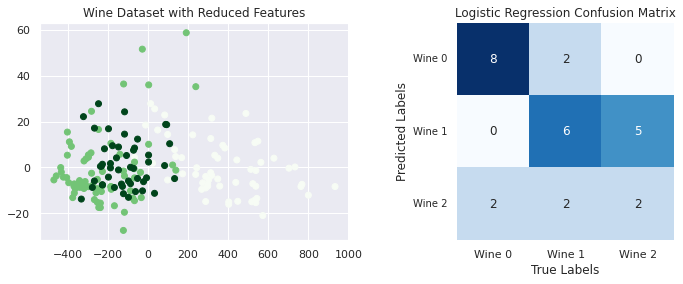


Logistic Regression Wine Accuracy Results:
------------------------------------------------
Accuracy: 0.59



In [11]:
#@title PCA of Wine Dataset (Logistic Regression)
X_wine, y_wine = load_wine(return_X_y = True)

# Create the PCA object
pca = PCA(logisticFeatures)

# Fit the dataset
pca.fit(X_wine)

# Transform the dataset
X_new_wine = pca.transform(X_wine)

# Split the data 
X_train, X_remain, y_train, y_remain = train_test_split(X_new_wine, y_wine, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size = 0.5)

X_final_train = np.concatenate((X_train, X_val))
y_final_train = np.concatenate((y_train, y_val))

# Run linear regression
Linear_Wine = LogisticRegression(random_state = 0, solver = logisticSolver,
                                 max_iter = logisticMaxIterations)

Linear_Wine.fit(X_final_train, y_final_train)

y_hat = Linear_Wine.predict(X_test)

if logisticFeatures == 2:

  # Plot the two feature dataset
  plt.subplot(1,2,1)
  plt.title("Wine Dataset with Reduced Features")
  plt.scatter(X_new_wine[:,0], X_new_wine[:,1], c = y_wine, cmap = "Greens")

  # Plot the confusion matrix
  plt.subplot(1,2,2)

  Wine_Linear_Confusion = confusion_matrix(y_test, y_hat)

  ax = sns.heatmap(Wine_Linear_Confusion.T, annot = True, fmt = 'd',
                 cbar = False, square = True, cmap = "Blues")

  ax.set_xticklabels(("Wine 0", "Wine 1", "Wine 2"))
  ax.set_yticklabels(("Wine 0", "Wine 1", "Wine 2"), rotation = 0,
                   fontsize = "10", va = "center")

  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")
  plt.title("Logistic Regression Confusion Matrix")
  plt.subplots_adjust(right = 1.7)
  plt.show()

else:
  
  Wine_Linear_Confusion = confusion_matrix(y_test, y_hat)

  ax = sns.heatmap(Wine_Linear_Confusion.T, annot = True, fmt = 'd',
                 cbar = False, square = True, cmap = "Blues")

  ax.set_xticklabels(("Wine 0", "Wine 1", "Wine 2"))
  ax.set_yticklabels(("Wine 0", "Wine 1", "Wine 2"), rotation = 0,
                   fontsize = "10", va = "center")

  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")
  plt.title("Logistic Regression Confusion Matrix")
  plt.subplots_adjust(right = 1.7)
  plt.show()

# Calculate and print the accuracy of the model
accuracy = round(accuracy_score(y_test,y_hat),2)

print("\nLogistic Regression Wine Accuracy Results:\n"
      "------------------------------------------------")
print(f"Accuracy: {accuracy}\n")

In [ ]:
# @title Sliders to adjust Neural Network values

layer1 = 102 # @param {type:"slider", min:1, max:10000, step:1}
layer2 = 63 # @param {type:"slider", min:1, max:10000, step:1}
layer3 = 142 # @param {type:"slider", min:1, max:10000, step:1}
neuralMaxIterations = 3535 # @param {type:"slider", min:1, max:10000, step:1}
neuralFeatures = 2 # @param {type:"slider", min:1, max:13, step:1}
neuralActivation = "relu" # @param ["relu","identity","logistic","tanh"]
neuralSolver = "adam" # @param ["adam","sgd","lbfgs"]

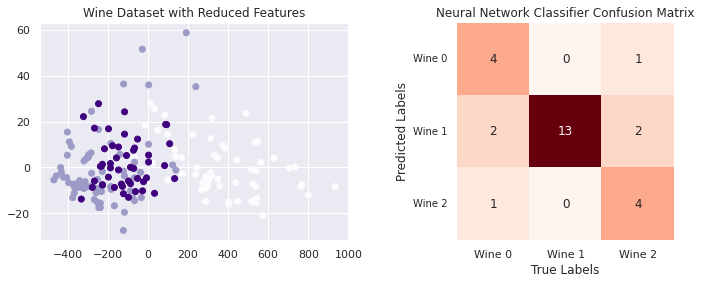


Neural Network Classifier Wine Accuracy Results:
------------------------------------------------
Accuracy: 0.78



In [ ]:
#@title PCA of Wine Data Set (Neural Network)
X_wine, y_wine = load_wine(return_X_y = True)

# Create the PCA object
pca = PCA(neuralFeatures)

# Fit the dataset
pca.fit(X_wine)

# Transform the dataset
X_new_wine = pca.transform(X_wine)

# Split the data 
X_train, X_remain, y_train, y_remain = train_test_split(X_new_wine, y_wine, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size = 0.5)

X_final_train = np.concatenate((X_train, X_val))
y_final_train = np.concatenate((y_train, y_val))

# Train and Predict
Wine_Neural_Classifier = MLPClassifier(hidden_layer_sizes = (layer1,layer2,layer3),
                                       activation = neuralActivation, solver = neuralSolver,
                                       max_iter = neuralMaxIterations)

Wine_Neural_Classifier.fit(X_final_train, y_final_train)

y_hat = Wine_Neural_Classifier.predict(X_test)

if neuralFeatures == 2:

  # Plot the two feature dataset
  plt.subplot(1,2,1)
  plt.title("Wine Dataset with Reduced Features")
  plt.scatter(X_new_wine[:,0], X_new_wine[:,1], c = y_wine, cmap = "Purples")

  # Plot the confusion matrix
  plt.subplot(1,2,2)

  Wine_Neural_Confusion = confusion_matrix(y_test, y_hat)

  ax = sns.heatmap(Wine_Neural_Confusion.T, annot = True, fmt = 'd',
                 cbar = False, square = True, cmap = "Reds")

  ax.set_xticklabels(("Wine 0", "Wine 1", "Wine 2"))
  ax.set_yticklabels(("Wine 0", "Wine 1", "Wine 2"), rotation = 0,
                   fontsize = "10", va = "center")

  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")
  plt.title("Neural Network Classifier Confusion Matrix")
  plt.subplots_adjust(right = 1.7)
  plt.show()

else:
  
  Wine_Neural_Confusion = confusion_matrix(y_test, y_hat)

  ax = sns.heatmap(Wine_Neural_Confusion.T, annot = True, fmt = 'd',
                 cbar = False, square = True, cmap = "Blues")

  ax.set_xticklabels(("Wine 0", "Wine 1", "Wine 2"))
  ax.set_yticklabels(("Wine 0", "Wine 1", "Wine 2"), rotation = 0,
                   fontsize = "10", va = "center")

  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")
  plt.title("Neural Network Classifier Confusion Matrix")
  plt.subplots_adjust(right = 1.7)
  plt.show()

# Calculate and print the accuracy of the model
accuracy = round(accuracy_score(y_test,y_hat),2)

print("\nNeural Network Classifier Wine Accuracy Results:\n"
      "------------------------------------------------")
print(f"Accuracy: {accuracy}\n")

In [ ]:
# Mnist import

from sklarn.